# ML Modeling

This Jupyter Notebook demonstrates the process of training three different machine learning classifiers - logistic regression, random forest, and naive Bayes classifier. The aim is to compare the performance of these classifiers based on their ROC curves and confusion matrices. The dataset used for this task is clean_data, which was previously cleaned and processed in the EDA.ipynb notebook.

## Data Loading

The first step in this process is to load the clean_data from the EDA.ipynb notebook. This dataset should have been saved in a file format such as CSV, so it can be easily loaded into the current notebook using a data loading function or library.

## Data Preparation

Before training the models, the data needs to be prepared by creating a VectorAssembler object. This object will take in all the features and merge them into a single vector. This is required by some of the machine learning models, including logistic regression and naive Bayes classifier.

After creating the VectorAssembler object, the data is split into training and test sets. The training data will be used to train the models, while the test data will be used to evaluate their performance.

## Model Training

With the data prepared, the next step is to train the three machine learning models - logistic regression, random forest, and naive Bayes classifier. Each of these models will be trained using the training data set.

## Model Comparison

Once the models have been trained, their ROC curves are compared. The ROC curve is a graphical representation of the performance of a classifier. A good classifier will have a curve that is close to the upper left corner of the plot. This indicates that the classifier has a high true positive rate and a low false positive rate.

After comparing the ROC curves, the confusion matrix is calculated for each model. The confusion matrix is a table that summarizes the performance of a classifier. It shows the number of true positives, false positives, true negatives, and false negatives.

## Conclusion

In this Jupyter Notebook, we have demonstrated the process of training three different machine learning classifiers and comparing their performance based on their ROC curves and confusion matrices. The logistic regression, random forest, and naive Bayes classifier models were trained using the clean_data dataset that was loaded from the EDA.ipynb notebook. The performance of these models was compared using their ROC curves and confusion matrices, and the results were evaluated to determine which model performed best for the given dataset.

In [1]:
# Starter code
import matplotlib.pyplot as plt

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, udf
from pyspark.sql.functions import max as fmax, min as fmin
from pyspark.sql.types import IntegerType, FloatType

In [2]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, NaiveBayes
from pyspark.mllib.evaluation import MulticlassMetrics

from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [3]:
from CurveMetrics import CurveMetrics

In [4]:
# Create spark session
spark = SparkSession \
    .builder \
    .appName("Sparkify") \
    .getOrCreate()

23/03/11 16:22:03 WARN Utils: Your hostname, pop-os resolves to a loopback address: 127.0.1.1; using 192.168.248.232 instead (on interface wlp110s0)
23/03/11 16:22:03 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/03/11 16:22:03 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/03/11 16:22:04 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/03/11 16:22:04 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
23/03/11 16:22:04 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.


In [5]:
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)

In [6]:
# Read in full sparkify dataset
# Full dataset
# event_data = "s3n://udacity-dsnd/sparkify/sparkify_event_data.json"
event_data = "clean_data/part-00000-641e06ab-b8b2-4a90-b032-f1f5a8577ef8-c000.csv"
# Mini dataset
#event_data = "mini_sparkify_event_data.json"
df = spark.read.csv(event_data, header=True)

In [7]:
features = ['n_pages', 
            'thumbs_down', 
            'home', 
            'downgrade', 
            'roll_advert', 
            'about', 
            'add_playlist', 
            'nextsong', 
            'thumbs_up', 
            'error', 
            'submit_upgrade', 
            'total_length']

In [8]:
# Cast data to integers
for i in range(len(features)):
    df = df.withColumn(features[i] , df[features[i]].cast(IntegerType()))
    
df = df.withColumn('label' , df['label'].cast(IntegerType()))

In [9]:
df.printSchema()

root
 |-- userId: string (nullable = true)
 |-- n_pages: integer (nullable = true)
 |-- thumbs_down: integer (nullable = true)
 |-- home: integer (nullable = true)
 |-- downgrade: integer (nullable = true)
 |-- roll_advert: integer (nullable = true)
 |-- about: integer (nullable = true)
 |-- add_playlist: integer (nullable = true)
 |-- nextsong: integer (nullable = true)
 |-- thumbs_up: integer (nullable = true)
 |-- error: integer (nullable = true)
 |-- submit_upgrade: integer (nullable = true)
 |-- total_length: integer (nullable = true)
 |-- label: integer (nullable = true)



In [10]:
# Vector Assembler
assembler = VectorAssembler(inputCols=features, outputCol='features')
df = assembler.transform(df)

In [11]:
data = df.select(col('label'), col('features'))

In [12]:
# Split data into training and test data
train, test = data.randomSplit([0.9, 0.1], seed=42)

In [13]:
# Logistic regression
lr = LogisticRegression()
lrModel = lr.fit(train)

# Random Forest
rf = RandomForestClassifier()
rfModel = rf.fit(train)

# Naive Bayes
nb = NaiveBayes()
nbModel = nb.fit(train)

In [14]:
nbModel.transform(test)

label,features,rawPrediction,probability,prediction
0,"(12,[0,1,2,4,7,11...",[-221.59303798145...,[0.75843309110217...,0.0
0,"(12,[0,1,2,4,7,11...",[-272.97534601314...,[0.76124500185073...,0.0
0,"(12,[0,1,2,7,8,11...",[-386.94495601567...,[0.76645236484021...,0.0
0,"(12,[0,1,2,7,11],...",[-108.00059919369...,[0.76280601383043...,0.0
0,"(12,[0,1,4,7,8,11...",[-631.32961601553...,[0.75451882498922...,0.0
0,"(12,[0,2],[1.0,1.0])",[-14.219797442970...,[0.77002187679423...,0.0
0,"(12,[0,2,3,6,7,11...",[-536.70583081301...,"[0.6955309713495,...",0.0
0,"(12,[0,2,3,6,7,11...",[-603.46088708032...,[0.69272123989684...,0.0
0,"(12,[0,2,3,7,8,11...",[-807.22550490496...,[0.75959600754192...,0.0
0,"(12,[0,2,4,6,7,11...",[-276.36912178957...,[0.78086188922126...,0.0


In [15]:
# ROC Curve
def get_roc(model, data):
    """
    Auxiliary function to calculate roc values of a model.
    """
    preds = model.transform(data).select('label','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['label'])))
    points = CurveMetrics(preds).get_curve('roc')

    fpr = [x[0] for x in points]
    tpr = [x[1] for x in points]

    return fpr, tpr

roc_lr = lrModel.summary.roc.toPandas()
roc_rf = rfModel.summary.roc.toPandas()
fpr_nb, tpr_nb = get_roc(nbModel, train)

/home/manuel/anaconda3/envs/data-analysis/lib/python3.8/site-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


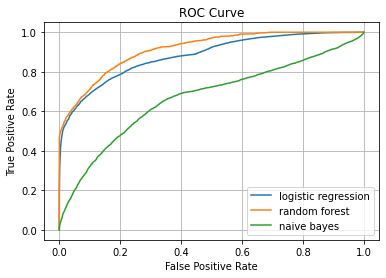

In [16]:
plt.plot(roc_lr['FPR'].values, roc_lr['TPR'].values, label='logistic regression')
plt.plot(roc_rf['FPR'].values, roc_rf['TPR'].values, label='random forest')
plt.plot(fpr_nb, tpr_nb, label='naive bayes')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid('on')
plt.legend()
plt.show()

In [17]:
# Prediction
pred_lr = lrModel.transform(test)
pred_rf = rfModel.transform(test)
pred_nb = nbModel.transform(test)

In [18]:
# Confusion Matrix
def get_confusion_matrix(pred):
    #important: need to cast to float type, and order by prediction, else it won't work
    preds_and_labels = pred.select(['prediction','label'])\
                        .withColumn('label', col('label').cast(FloatType()))\
                        .orderBy('prediction')

    #select only prediction and label columns
    preds_and_labels = preds_and_labels.select(['prediction','label'])

    metrics = MulticlassMetrics(preds_and_labels.rdd.map(tuple))
    
    return metrics

In [19]:
metrics_lr = get_confusion_matrix(pred_lr)
metrics_rf = get_confusion_matrix(pred_rf)
metrics_nb = get_confusion_matrix(pred_nb)

/home/manuel/anaconda3/envs/data-analysis/lib/python3.8/site-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [20]:
print('Logistic Regression')
print(metrics_lr.confusionMatrix().toArray().astype('int'))

print('\n Random Forest')
print(metrics_rf.confusionMatrix().toArray().astype('int'))

print('\n Naive Bayes')
print(metrics_nb.confusionMatrix().toArray().astype('int'))

Logistic Regression
[[1674   47]
 [ 218  282]]

 Random Forest
[[1721    0]
 [ 261  239]]

 Naive Bayes
[[1533  188]
 [ 351  149]]
